In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42

import seaborn as sns

sns.set_theme(style="dark")
import sys



from scripts.paper_figures.data_processing.data_processing import main as init_data
from scripts.paper_figures.data_processing.process_pumping import ProboscisProcessing


In [ ]:
# Initialize Data
llh, process_data, io_process,expt_info_df = init_data()

In [ ]:
# Process proboscis bouts, change "load_bouts=True" if you want to load
proboscis = ProboscisProcessing(process_data, llh, io_process,force_recalculate=False)
proboscis.generate_prob_bouts(load_bouts=True)

In [ ]:
expt_info_df.ExptNames[1]

[2023-09-10 13:51:44] INFO - maxp pruned
[2023-09-10 13:51:44] INFO - LTSH dropped
[2023-09-10 13:51:44] INFO - cmap pruned
[2023-09-10 13:51:44] INFO - kern dropped
[2023-09-10 13:51:44] INFO - post pruned
[2023-09-10 13:51:44] INFO - PCLT dropped
[2023-09-10 13:51:44] INFO - JSTF dropped
[2023-09-10 13:51:44] INFO - meta dropped
[2023-09-10 13:51:44] INFO - DSIG dropped
[2023-09-10 13:51:44] INFO - GPOS pruned
[2023-09-10 13:51:44] INFO - GSUB pruned
[2023-09-10 13:51:44] INFO - glyf pruned
[2023-09-10 13:51:44] INFO - Added gid0 to subset
[2023-09-10 13:51:44] INFO - Added first four glyphs to subset
[2023-09-10 13:51:44] INFO - Closing glyph list over 'GSUB': 35 glyphs before
[2023-09-10 13:51:44] INFO - Glyph names: ['.notdef', 'A', 'B', 'D', 'F', 'M', 'S', 'T', 'Z', 'a', 'colon', 'comma', 'd', 'e', 'eight', 'five', 'four', 'glyph00001', 'glyph00002', 'l', 'm', 'nine', 'one', 'r', 's', 'seven', 'six', 'space', 'three', 'two', 'u', 'underscore', 'x', 'y', 'zero']
[2023-09-10 13:51:

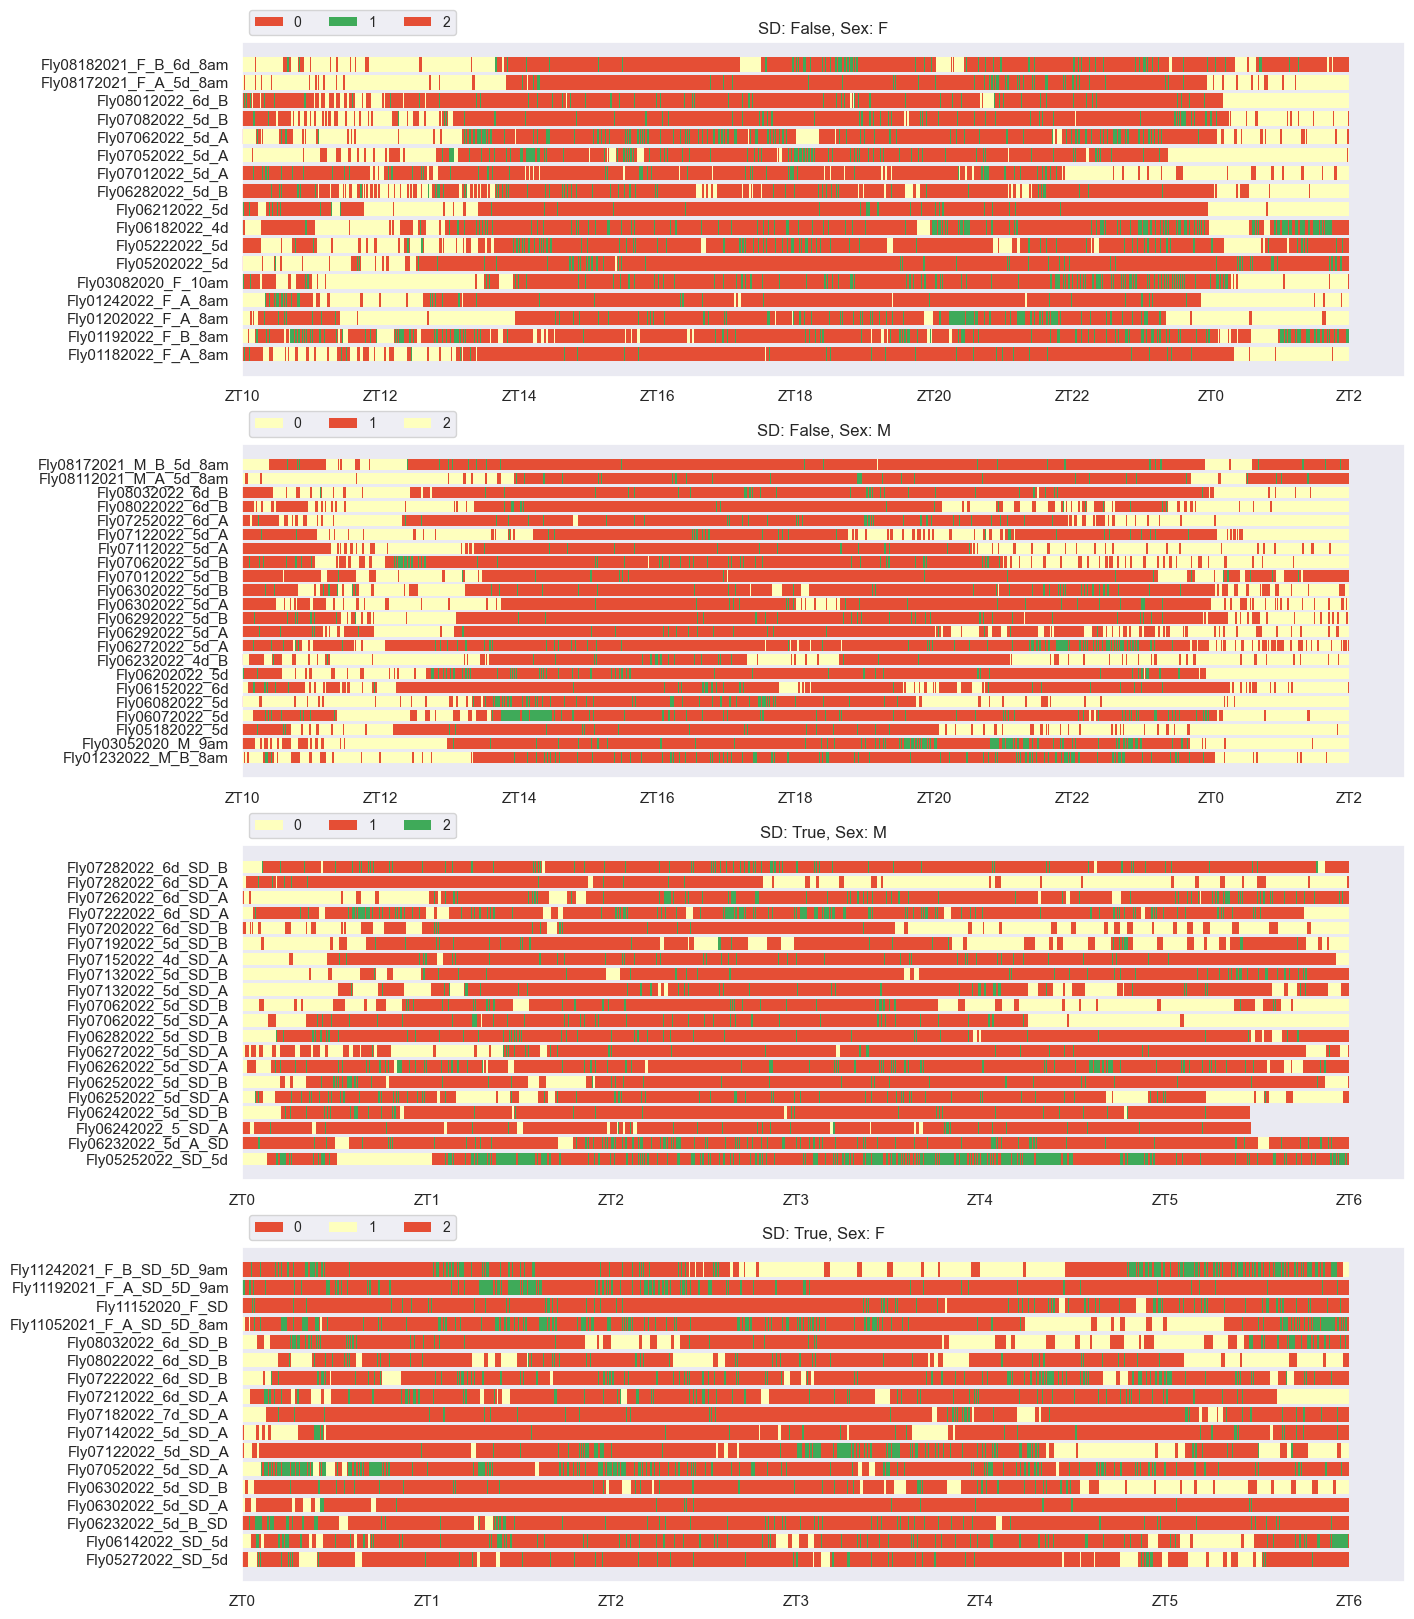

In [113]:
from importlib import reload
import scripts.paper_figures.data_processing.process_macro_micro  # Import the module first

from importlib import reload

import basty.utils.misc
reload(basty.utils.misc)


# Now reload the module
reload(scripts.paper_figures.data_processing.process_macro_micro)

# Re-import your specific class/function
from scripts.paper_figures.data_processing.process_macro_micro import ExperimentOutline

expt_outline = ExperimentOutline(io_process.project.project_path)

bout_df_all, outline_df_all = expt_outline.outline_expt_all(expt_info_df)

merged_df = pd.merge(bout_df_all, expt_info_df, left_on='Experiment Name', right_on='ExptNames')

FIG_PATH = r"C:\Users\Grover\Documents\GitHub\deepsleepfigs"
save_micro_macro = os.path.join(FIG_PATH, "micro_macro.pdf")

ExperimentOutline.plot_ethogram(merged_df,save_path=save_micro_macro)

In [ ]:
newDf = pd.merge(df_data, expt_info_df, left_on="ExptNames", right_on="ExptNames")

In [ ]:
wt_all = newDf[newDf["SD"] == False]
male_wt = wt_all[wt_all["Sex"] == "M"]
female_wt = wt_all[wt_all["Sex"] == "F"]

In [ ]:
newDf

In [ ]:
filterer = FilterData(newDf, llh)

In [ ]:
filterer.plot_mean_likelihood()

In [ ]:
binary_mask = filterer.create_binary_masks(llh, BODY_PART_SETS, 0.7)

In [ ]:
masked_data_df = filterer.apply_binary_masks(binary_mask, newDf)

In [ ]:
masked_data_df

In [ ]:
binary_mask

In [ ]:
masked_data_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'masked_data_df'
# and has columns 'ExptNames', 'ValueColumn' (replace with your actual column name)
# Add row numbers if they don't exist
masked_data_df["Row"] = masked_data_df.index

# Pivot the DataFrame
pivoted_df = masked_data_df.pivot(
    index="ExptNames", columns="Row", values="ProboscisPumping"
)

# Create a heatmap using Seaborn, handling NaN values with a different color (e.g., gray)
plt.figure(figsize=(16, 9))
sns.heatmap(
    pivoted_df,
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"ticks": [0, 1]},
    mask=pivoted_df.isna(),
    linecolor="gray",
)

# Set plot attributes
plt.xlabel("Rows")
plt.ylabel("ExptNames")
plt.title("Heatmap of Data")

# Save the plot as a PNG file
FIG_PATH = r"C:\Users\Grover\Documents\GitHub\deepsleepfigs"
plt.savefig(f"{FIG_PATH}\\heatmap.png", dpi=300, bbox_inches="tight")

# Display the plot in the notebook (optional)
plt.show()

In [ ]:
plot_folder = r"C:\Users\Grover\Documents\GitHub\deepsleepfigs\score_plots"
if not os.path.isdir(plot_folder):
    os.makedirs(plot_folder)

In [ ]:
male_wt["Time"] = male_wt["Idx"].apply(BehaviorData.get_time_stamp)
male_wt.index = pd.to_datetime(list(male_wt["Time"]))
rate = "1S"
male_wt_rs = BehaviorData.resample_df(male_wt, rate, BEHAVIORS)
male_wt_rs["TimeStamp"] = male_wt_rs.index

In [ ]:
male_wt

In [ ]:
llh["Time"] = llh["Idx"].apply(BehaviorData.get_time_stamp)

In [ ]:
BehaviorData.pivot_and_plot(male_wt_rs, "mal_b_scr_", plot_folder, rate, BEHAVIORS)

In [ ]:
import os

In [ ]:
os.listdir(plot_folder)

In [ ]:
df_pivoted = male_wt_rs.pivot(
    index="ExptNames", columns="TimeStamp", values="ProboscisPumping"
)
a4_dims = (25.7, 5.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("ProboscisPumping")
ax = sns.heatmap(df_pivoted, cmap="YlGnBu")

In [ ]:
male_wt_rs

In [ ]:
unique_expt_names = male_wt["ExptNames"].unique()

a4_dims = (25.7, 5.27)
# Plot the unmasked data heatmap
# plt.figure(figsize=(a4_dims))
# sns.heatmap(unmasked_data, cmap='YlGnBu', yticklabels=unique_expt_names)
# plt.xlabel('Data')
# plt.ylabel('ExptNames')
# plt.title('Unmasked Data')
# plt.savefig(os.path.join(plot_folder,'unmasked_data_heatmap_full_07.png'), dpi=300)  # Save the figure as a PNG file
# plt.show()

In [ ]:
# Plot the masked data heatmap
plt.figure(figsize=(a4_dims))
sns.heatmap(masked_data, cmap="YlGnBu", yticklabels=unique_expt_names)
plt.xlabel("Data")
plt.ylabel("ExptNames")
plt.title("Masked Data")
plt.savefig(os.path.join(plot_folder, "masked_data_heatmap_full_09.png"), dpi=300)
plt.show()

In [ ]:
snap_paths = [
    {expt_names: os.path.join(project.project_path, expt_names, "snap_stft.pkl")}
    for expt_names in project.expt_names
]
snap_col_names = [
    os.path.join(project.project_path, expt_names, "ftname_to_snapft.yaml")
    for expt_names in project.expt_names
]

In [ ]:
df_data

In [ ]:
df_data